In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
df_test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [5]:
df_train.shape, df_test.shape

((9557, 143), (23856, 142))

In [6]:
dtypes=df_train.dtypes.reset_index()
dtypes.columns=["feature name","dtypes"]
dtypes.groupby('dtypes').agg("count").reset_index()

,dtypes,feature name
0,int64,130
1,float64,8
2,object,5


In [7]:
obj=df_train.select_dtypes(include=['object']).copy()
integer=df_train.select_dtypes(include=['int64']).copy()
flot=df_train.select_dtypes(include=['float64']).copy()

In [8]:
obj.shape,integer.shape,flot.shape

((9557, 5), (9557, 130), (9557, 8))

In [9]:
obj.columns[obj.isna().sum()>0]

Index([], dtype='object')

In [10]:
integer.columns[integer.isna().sum()>0]

Index([], dtype='object')

In [11]:
flot.columns[flot.isnull().sum()>0]

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned'], dtype='object')

In [12]:
data = df_train[df_train['v2a1'].isnull()].head()
rent=['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']

In [13]:
data[rent]
'''tipovivi1, =1 own and fully paid house
tipovivi2, =1 own, paying in installments
tipovivi3, =1 rented
tipovivi4, =1 precarious
tipovivi5, =1 other(assigned, borrowed)'''

'tipovivi1, =1 own and fully paid house\ntipovivi2, =1 own, paying in installments\ntipovivi3, =1 rented\ntipovivi4, =1 precarious\ntipovivi5, =1 other(assigned, borrowed)'

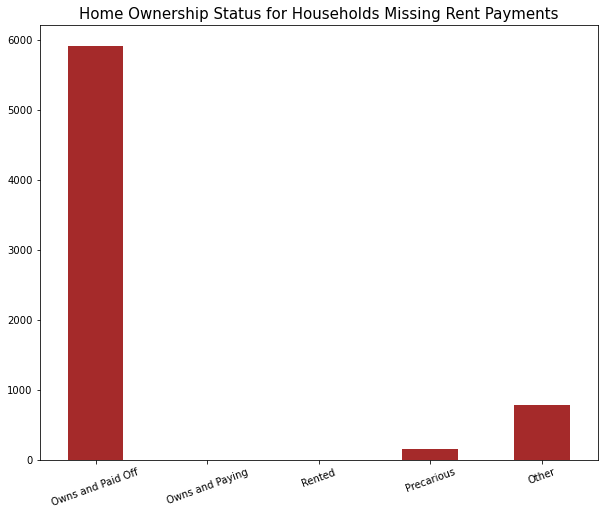

In [14]:
rent_variables = [x for x in df_train if x.startswith('tipo')]
df_train.loc[df_train['v2a1'].isnull(),rent_variables].sum().plot.bar(figsize = (10, 8), color = 'brown', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 15);

In [15]:
df_train['v2a1'].fillna(value=0,inplace=True)
df_test['v2a1'].fillna(value=0,inplace=True)
df_train['v2a1'].isnull().sum()

0

In [16]:
df_train['v18q1'].isna().sum()#number of tablets household owns

7342

In [17]:
heads=df_train.loc[df_train['parentesco1']==1].copy()
heads.groupby('v18q')['v18q1'].apply(lambda x: x.isnull().sum())

v18q
0    2318
1       0
Name: v18q1, dtype: int64

In [18]:
df_train['v18q1'].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.])

In [19]:
df_train['v18q1'].fillna(value=0,inplace=True)
df_test['v18q1'].fillna(value=0,inplace=True)
df_train['v18q1'].isnull().sum()

0

In [20]:
df_train['rez_esc'].isna().sum()#Years behind in school

7928

In [21]:
df_train[df_train['rez_esc'].isna()]['age']

0       43
1       67
2       92
4       37
5       38
        ..
9552    46
9553     2
9554    50
9555    26
9556    21
Name: age, Length: 7928, dtype: int64

In [22]:
df_train[df_train['rez_esc'].notnull()]['age'].describe()

count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [23]:
df_train[df_train['rez_esc'].isnull()]['age'].describe()

count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64

In [24]:
df_train.loc[(df_train['rez_esc'].isnull() &
               ((df_train['age']>7) & (df_train['age']<17)))]['age'].describe()# only 1 member is behind in school years

count     1.0
mean     10.0
std       NaN
min      10.0
25%      10.0
50%      10.0
75%      10.0
max      10.0
Name: age, dtype: float64

In [25]:
df_train[(df_train['age']==10) & (df_train['rez_esc'].isnull())]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
2514,ID_f012e4242,160000.0,0,6,0,1,1,1,1.0,0,...,0,100,9,121,1,2.25,0.25,182.25,100,4


In [26]:
df_train['rez_esc'].fillna(value=0,inplace=True)
df_test['rez_esc'].fillna(value=0,inplace=True)
df_train['rez_esc'].isnull().sum()

0

In [27]:
mapping={'yes':1,'no':0}

for df in [df_train, df_test]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)

In [28]:
df_train['meaneduc'].isna().sum()#average years of education for adults (18+)

5

In [29]:
df_train['meaneduc'].notnull().describe()

count     9557
unique       2
top       True
freq      9552
Name: meaneduc, dtype: object

In [30]:
data=df_train[df_train['meaneduc'].isna()]
cols=['edjefe','edjefa','instlevel1','instlevel2']

In [31]:
data[cols][data[cols]['instlevel1']>0].describe()

,edjefe,edjefa,instlevel1,instlevel2
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [32]:
df_train['meaneduc'].fillna(value=0,inplace=True)
df_test['meaneduc'].fillna(value=0,inplace=True)
df_train['meaneduc'].isnull().sum()

0

In [33]:
df_train['SQBmeaned'].isna().sum()#square of the mean years of education of adults (>=18) in thehousehold

5

In [34]:
df_train['SQBmeaned'].describe()

count    9552.000000
mean      102.588867
std        93.516890
min         0.000000
25%        36.000000
50%        81.000000
75%       134.560010
max      1369.000000
Name: SQBmeaned, dtype: float64

In [35]:
df_train['SQBmeaned'].fillna(value=0,inplace=True)
df_test['SQBmeaned'].fillna(value=0,inplace=True)
df_train['SQBmeaned'].isnull().sum()

0

In [36]:
df_train.columns[df_train.isna().sum()>0]

Index([], dtype='object')

In [37]:
df_test.columns[df_test.isna().sum()>0]

Index([], dtype='object')

In [38]:
df_train['parentesco1'].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [39]:
df_train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [40]:
all_equal=df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

In [41]:
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [42]:
not_equal.head()

idhogar
0172ab1d9    False
03f4e5f4d    False
0511912b6    False
078a0b6e2    False
09e25d616    False
Name: Target, dtype: bool

In [43]:
df_train[df_train['idhogar']== not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [44]:
hhead=df_train.groupby('idhogar')['parentesco1'].sum()

In [45]:
hnhead=df_train.loc[df_train['idhogar'].isin(hhead[hhead==0].index),:]
print('There are {} households without a head.'.format(hnhead['idhogar'].nunique()))

There are 15 households without a head.


In [46]:
households_no_head_equal = hnhead.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different Target value.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different Target value.


In [47]:
for household in not_equal.index:
    true_target = int(df_train[(df_train['idhogar'] == household) & (df_train['parentesco1'] == 1.0)]['Target'])
    df_train.loc[df_train['idhogar'] == household, 'Target'] = true_target
all_equal = df_train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 0 households where the family members do not all have the same target.


In [48]:
target_count= heads['Target'].value_counts().sort_index()
target_count

1     222
2     442
3     355
4    1954
Name: Target, dtype: int64

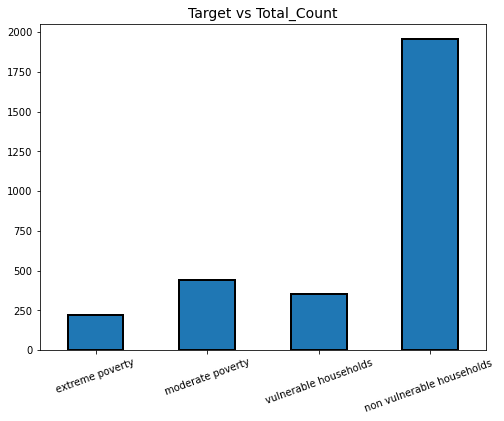

In [49]:
target_count.plot.bar(figsize = (8, 6),linewidth = 2,edgecolor = 'k')
plt.xticks([0, 1, 2, 3],
           ['extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households '],
          rotation = 20)
plt.title('Target vs Total_Count', size = 14);

Extreme poverty is smallest among all 4. Hence, data is biased.

In [50]:
print(df_train.shape)
cols=['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']
for df in [df_train,df_test]:
    df.drop(columns=cols,inplace=True)
print(df_train.shape)

(9557, 143)
(9557, 134)


In [51]:
id_ = ['Id', 'idhogar', 'Target']
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']
ind_ordered = ['rez_esc', 'escolari', 'age']
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']
hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [52]:
heads = df_train.loc[df_train['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

In [53]:
corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

<ipython-input-53-fbbcc398e421>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [54]:
df_train.Target.isna().sum()

0

In [55]:
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


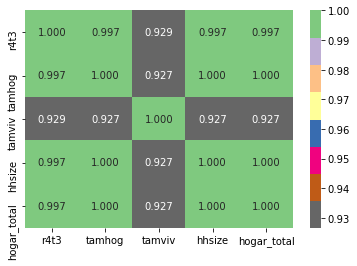

In [56]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.Accent_r, fmt='.3f');

In [57]:
cols=['tamhog', 'hogar_total', 'r4t3']
for df in [df_train, df_test]:
    df.drop(columns = cols,inplace=True)

df_train.shape

(9557, 131)

In [58]:
ind = df_train[id_ + ind_bool + ind_ordered]
ind.shape

(9557, 39)

In [59]:
corr_matrix = ind.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

<ipython-input-59-f9dc2dbdb69b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


['female']

In [60]:
for df in [df_train, df_test]:
    df.drop(columns = 'male',inplace=True)
df_train.shape

(9557, 130)

In [61]:
for df in [df_train, df_test]:
    df.drop(columns = 'area2',inplace=True)
df_train.shape

(9557, 129)

In [62]:
cols=['Id','idhogar']
for df in [df_train, df_test]:
    df.drop(columns = cols,inplace=True)

df_train.shape

(9557, 127)

In [63]:
df_train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,age,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,1,1,0,0,0,0,0,1,43,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,1,1,0,0,0,0,0,1,67,4
2,0.0,0,8,0,1,1,0,0.0,0,0,...,0,1,0,0,0,0,0,1,92,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,3,1,0,0,0,0,0,1,17,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,3,1,0,0,0,0,0,1,37,4


In [64]:
X=df_train.iloc[:,0:-1]
y=df_train.iloc[:,-1]
X.shape,y.shape

((9557, 126), (9557,))

In [65]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
rf=RandomForestClassifier()

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6689, 126)
(2868, 126)
(6689,)
(2868,)


In [68]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
pred=rf.predict(X_test)

In [70]:
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.9334030683403068
[[ 199    5    0    1]
 [   3  415   11    5]
 [   1    3  270    5]
 [  41   56   60 1793]]
              precision    recall  f1-score   support

           1       0.82      0.97      0.89       205
           2       0.87      0.96      0.91       434
           3       0.79      0.97      0.87       279
           4       0.99      0.92      0.96      1950

    accuracy                           0.93      2868
   macro avg       0.87      0.95      0.91      2868
weighted avg       0.94      0.93      0.94      2868



In [71]:
kfold=KFold(random_state=10,n_splits=5,shuffle=True)

In [72]:
print(cross_val_score(rf,X,y,cv=kfold,scoring='accuracy'))

[0.93723849 0.94769874 0.9392988  0.94034537 0.94714809]


In [73]:
results=cross_val_score(rf,X,y,cv=kfold,scoring='accuracy')

In [74]:
print(results.mean()*100)

94.33917049278675
